In [ ]:
import tensorflow as tf
import pickle
from tensorflow import keras
from tensorflow.keras  import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler





   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0     0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62    0.0
1     0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69    0.0
2     1 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66    0.0
3     1 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50    0.0
4     2 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99    0.0

[5 rows x 31 columns]
(17505, 31)
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
0.0    17423
1.0       81
Name: Class, dtype: int64
(17423, 31) (81, 31)
(81, 31)
      Time        V1        V2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
5/5 [==============================] - 2s 78ms/step - loss: 0.9738 - accuracy: 0.5891 - val_loss: 0.6386 - val_accuracy: 0.6061
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 0.5722 - accuracy: 0.7364 - val_loss: 0.6068 - val_accuracy: 0.8182
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 0.4856 - accuracy: 0.7442 - val_loss: 0.5768 - val_accuracy: 0.8485
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 0.4786 - accuracy: 0.8450 - val_loss: 0.5495 - val_accuracy: 0.8485
Epoch 5/50
5/5 [==============================] - 0s 13ms/step - loss: 0.3579 - accuracy: 0.8760 - val_loss: 0.5268 - val_accuracy: 0.8485
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 0.3065 - accuracy: 0.8682 - val_loss: 0.5079 - val_accuracy: 0.8485
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 0.2894 - accuracy: 0.9070 - val_loss: 0.4918 - val_accuracy: 0.8485
Epoch 8/50
5/5 [===========

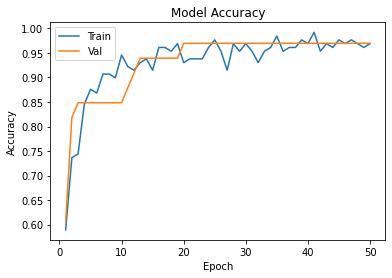

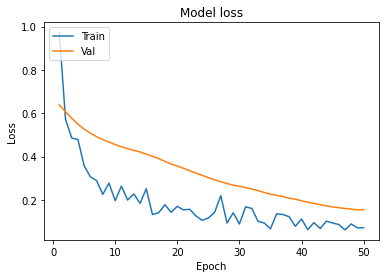

None


In [ ]:
data=pd.read_csv('creditcard.csv')
print(data.head())
print(data.shape)
print(data.isnull().sum())
print(data['Class'].value_counts())
non_fraud=data[data['Class']==0]
fraud=data[data['Class']==1]
print(non_fraud.shape,fraud.shape)
non_fraud=non_fraud.sample(fraud.shape[0])
print(non_fraud.shape)
data=fraud.append(non_fraud,ignore_index=True)
print(data)
print(data['Class'].value_counts())
x=data.drop('Class',axis=1)
y=data['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)
print(x_train.shape,x_test.shape)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
print(x_train.shape)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_train.shape,x_test.shape)
epochs=50
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test),verbose=1)
def plot_learningCurve(history,epoch):
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()
print(plot_learningCurve(history,epochs))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_6 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 14, 32)           0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 13, 64)            4160      
                                                                 
 batch_normalization_7 (Batc  (None, 13, 64)          

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


5/5 [==============================] - 1s 60ms/step - loss: 1.7086 - accuracy: 0.4961 - val_loss: 0.7206 - val_accuracy: 0.5152
Epoch 2/50
5/5 [==============================] - 0s 13ms/step - loss: 1.5357 - accuracy: 0.5349 - val_loss: 0.7139 - val_accuracy: 0.5152
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 1.4056 - accuracy: 0.4651 - val_loss: 0.7072 - val_accuracy: 0.5152
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 1.2136 - accuracy: 0.5271 - val_loss: 0.7020 - val_accuracy: 0.4848
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 1.3458 - accuracy: 0.5891 - val_loss: 0.6964 - val_accuracy: 0.4848
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 1.1354 - accuracy: 0.5891 - val_loss: 0.6900 - val_accuracy: 0.4848
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 1.2783 - accuracy: 0.4496 - val_loss: 0.6836 - val_accuracy: 0.4848
Epoch 8/50
5/5 [======================

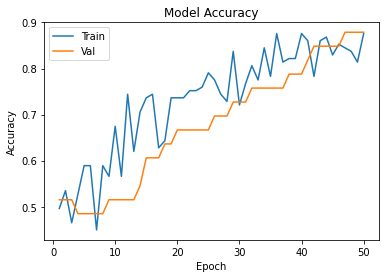

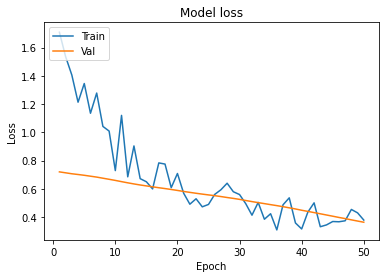

None
INFO:tensorflow:Assets written to: ram://657fb736-fdaf-4eda-8d79-8ec4cf17438e/assets
[[0.00264323]]


In [ ]:
epochs=50
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test),verbose=1)
print(plot_learningCurve(history,epochs))
model.save("model.hdf5")
file_name='final_model.pkl'
pickle.dump(model,open(file_name,'wb'))
loaded_model=pickle.load(open(file_name,'rb'))
y_pred=loaded_model.predict([[472,-3.04,-3.15,-1.7,2.45,0.45,-0.243,1.34,-0.3242,1.34,2.45,2.78,2.25,2.34,.90,2.34,2.345
                              -0.45,.45,.35,0.267,0.345,2.34,.23,.34,-0.354,0.345,0.45,0.45,2.34,149.72]])
print(y_pred)



In [ ]:
!pip install flask_ngrok


In [ ]:
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null &&  echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok

deb https://ngrok-agent.s3.amazonaws.com buster main
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 https://ngrok-agent.s3.amazonaws.com buster InRelease [7,470 B]

In [ ]:
!ngrok authtoken 25QNptNW19qLgrg5kXH2Pr6NP8y_6JaYptLNKWdZVqjQ9u38Z

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask,request,jsonify,render_template
app=Flask(__name__)
run_with_ngrok(app)
@app.route('/')
def home ():
  return render_template("index.html")
@app.route('/predict',methods=['POST','GET'])
def predict():
  global result
  if request.method=='POST':
    time=request.form['time']
    v1=request.form['V1']
    v2=request.form['V2']
    v3= request.form['V3']
    v4= request.form['V4']
    v5= request.form['V5']
    v6= request.form['V6']
    v7= request.form['V7']
    v8= request.form['V8']
    v9= request.form['V9']
    v10=request.form['V10']
    v11= request.form['V11']
    v12= request.form['V12']
    v13= request.form['V13']
    v14= request.form['V14']
    v15= request.form['V15']
    v16= request.form['V16']
    v17= request.form['V17']
    v18= request.form['V18']
    v19= request.form['V19']
    v20= request.form['V20']
    v21= request.form['V21']
    v22= request.form['V22']
    v23= request.form['V23']
    v24= request.form['V24']
    v25= request.form['V25']
    v26= request.form['V26']
    v27 = request.form['V27']
    v28 = request.form['V28']
    amount=request.form['amt']
    model=pickle.load(open(file_name, 'rb'))
    result=model.predict([[float(time),float(v1),float(v2),float(v3),float(v4),float(v5),float(v6),float(v7)
                            ,float(v8),float(v9),float(v10),float(v11),float(12),float(v13),float(v14),float(v15),
                           float(v16),float(v17),float(v18),float(v19),float(v20),float(v21),float(v22),float(v23),float(v24),float(v25),float(v26)
                                  ,float(v27),float(v28),float(amount)]])
    if int(result[0])==1:
      prediction="Given Transaction is Fraudulent"
    else:
      prediction="Given Transaction is Genuine/Non-Fraudulent"
    return render_template("result.html",prediction=prediction)
app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://4d34-34-86-234-241.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
